In [24]:
import pandas as pd
tape_file_path = '/Users/ramkh/Downloads/Tapes_UoB_Set01_2025-01-02tapes.csv'
tape_data = pd.read_csv(tape_file_path)

tape_data.head()


,10.881,267,1
0,11.067,269,1
1,11.222,267,2
2,12.338,270,2
3,13.733,267,3
4,18.321,265,2


In [25]:
column_names = ['Time', 'Price', 'Quantity']
tape_data = pd.read_csv(tape_file_path, names=column_names)

tape_data.head()


,Time,Price,Quantity
0,10.881,267,1
1,11.067,269,1
2,11.222,267,2
3,12.338,270,2
4,13.733,267,3


In [26]:
tape_statistics = tape_data.describe()

tape_statistics


,Time,Price,Quantity
count,23811.000000,23811.000000,23811.000000
mean,15096.379813,280.834614,2.014741
std,8960.325880,12.760167,1.155885
min,10.881000,243.000000,1.000000
25%,7102.549500,271.000000,1.000000
50%,15112.655000,285.000000,2.000000
75%,22837.994500,290.000000,3.000000
max,30599.728000,303.000000,5.000000


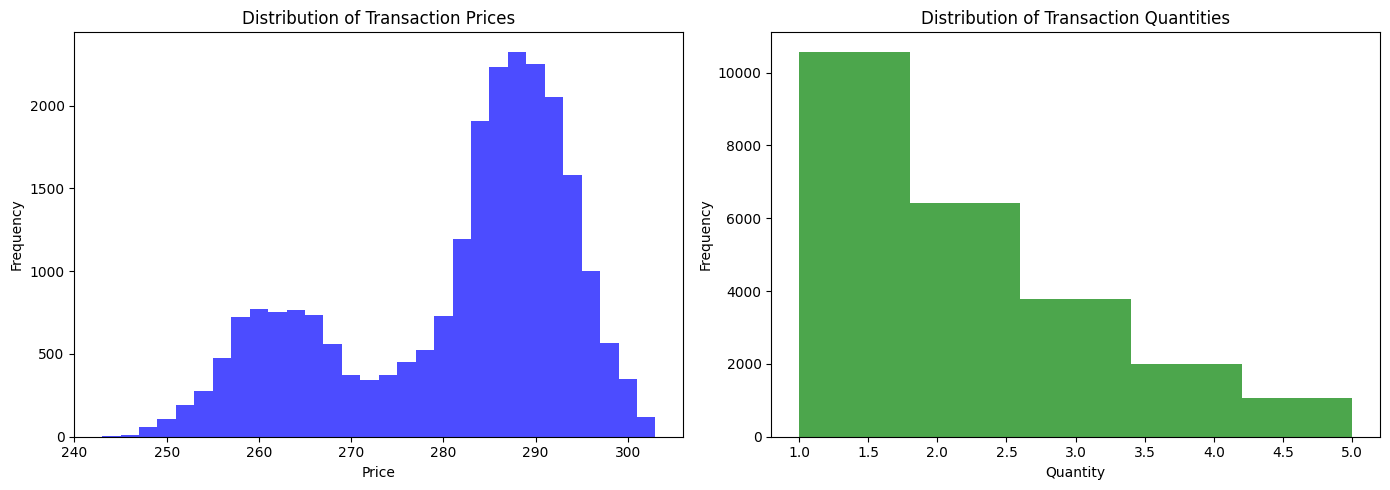

In [27]:
import matplotlib.pyplot as plt

# Plotting the distribution of prices and quantities
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Price Distribution
ax[0].hist(tape_data['Price'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Distribution of Transaction Prices')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')

# Quantity Distribution
ax[1].hist(tape_data['Quantity'], bins=5, color='green', alpha=0.7)  # Fewer bins due to small range of quantities
ax[1].set_title('Distribution of Transaction Quantities')
ax[1].set_xlabel('Quantity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [28]:
lob_file_path = '/Users/ramkh/Documents/Final Year Project/dsmp-2024-group22/data_preprocess/UoB_Set01_2025-01-02LOBs.txt'
lob_data = []

with open(lob_file_path, 'r') as file:
    for line in file:
        lob_data.append(line.strip())

lob_data[:10]


["[0.000, Exch0, [['bid', []], ['ask', []]]]",
 "[0.279, Exch0, [['bid', [[1, 6]]], ['ask', []]]]",
 "[1.333, Exch0, [['bid', [[1, 6]]], ['ask', [[800, 1]]]]]",
 "[1.581, Exch0, [['bid', [[1, 6]]], ['ask', [[799, 1]]]]]",
 "[1.643, Exch0, [['bid', [[1, 6]]], ['ask', [[798, 1]]]]]",
 "[1.736, Exch0, [['bid', [[261, 1], [1, 6]]], ['ask', [[798, 1]]]]]",
 "[1.984, Exch0, [['bid', [[261, 1], [1, 6]]], ['ask', [[797, 1]]]]]",
 "[2.015, Exch0, [['bid', [[261, 1], [1, 6]]], ['ask', [[338, 3], [797, 1]]]]]",
 "[2.139, Exch0, [['bid', [[261, 1], [1, 6]]], ['ask', [[297, 5], [338, 3], [797, 1]]]]]",
 "[2.697, Exch0, [['bid', [[262, 6], [261, 1]]], ['ask', [[297, 5], [338, 3], [797, 1]]]]]"]

In [29]:
example_lines = [lob_data[0], lob_data[1], lob_data[5], lob_data[10]]
example_lines


["[0.000, Exch0, [['bid', []], ['ask', []]]]",
 "[0.279, Exch0, [['bid', [[1, 6]]], ['ask', []]]]",
 "[1.736, Exch0, [['bid', [[261, 1], [1, 6]]], ['ask', [[798, 1]]]]]",
 "[3.069, Exch0, [['bid', [[262, 6], [261, 1]]], ['ask', [[296, 1], [297, 5], [338, 3], [797, 1]]]]]"]

In [30]:
import ast

data_parsed_manual = {
    "Time": [],
    "Exchange": [],
    "Bids": [],
    "Asks": []
}

for line in lob_data:

    parts = line.strip()[1:-1].split(', ', 2)  # Strip outer brackets and split
    
    # Time and Exchange
    time = float(parts[0])
    exchange = parts[1]
    
    # Evaluating bids and asks part
    bids_asks_str = parts[2]
    bids_asks = ast.literal_eval(bids_asks_str)  # Convert string to list
    
    # Extract bids and asks
    bids = bids_asks[0][1]
    asks = bids_asks[1][1]
    
    # Append to data dictionary
    data_parsed_manual["Time"].append(time)
    data_parsed_manual["Exchange"].append(exchange)
    data_parsed_manual["Bids"].append(bids)
    data_parsed_manual["Asks"].append(asks)

# Convert to DataFrame
lob_df_manual = pd.DataFrame(data_parsed_manual)
lob_df_manual.head()


,Time,Exchange,Bids,Asks
0,0.000,Exch0,[],[]
1,0.279,Exch0,"[[1, 6]]",[]
2,1.333,Exch0,"[[1, 6]]","[[800, 1]]"
3,1.581,Exch0,"[[1, 6]]","[[799, 1]]"
4,1.643,Exch0,"[[1, 6]]","[[798, 1]]"


In [31]:
# Inspecting the content and format of the string to ensure proper parsing
example_lines = [lob_data[0], lob_data[1], lob_data[5], lob_data[10]]
example_lines


["[0.000, Exch0, [['bid', []], ['ask', []]]]",
 "[0.279, Exch0, [['bid', [[1, 6]]], ['ask', []]]]",
 "[1.736, Exch0, [['bid', [[261, 1], [1, 6]]], ['ask', [[798, 1]]]]]",
 "[3.069, Exch0, [['bid', [[262, 6], [261, 1]]], ['ask', [[296, 1], [297, 5], [338, 3], [797, 1]]]]]"]

In [32]:
# Manual parsing approach to extract bids and asks accurately
data_parsed_manual = {
    "Time": [],
    "Exchange": [],
    "Bids": [],
    "Asks": []
}

for line in lob_data:
    # Split by commas to get the main parts, but keep the bids and asks together
    parts = line.strip()[1:-1].split(', ', 2)  # Strip outer brackets and split
    
    # Time and Exchange
    time = float(parts[0])
    exchange = parts[1]
    
    # Evaluating bids and asks part
    bids_asks_str = parts[2]
    bids_asks = ast.literal_eval(bids_asks_str)  # Convert string to list
    
    # Extract bids and asks
    bids = bids_asks[0][1]
    asks = bids_asks[1][1]
    
    # Append to data dictionary
    data_parsed_manual["Time"].append(time)
    data_parsed_manual["Exchange"].append(exchange)
    data_parsed_manual["Bids"].append(bids)
    data_parsed_manual["Asks"].append(asks)

# Convert to DataFrame
lob_df_manual = pd.DataFrame(data_parsed_manual)
lob_df_manual.head()


In [ ]:
# Manual parsing approach to extract bids and asks accurately
data_parsed_manual = {
    "Time": [],
    "Exchange": [],
    "Bids": [],
    "Asks": []
}

for line in lob_data:
    # Split by commas to get the main parts, but keep the bids and asks together
    parts = line.strip()[1:-1].split(', ', 2)  # Strip outer brackets and split
    
    # Time and Exchange
    time = float(parts[0])
    exchange = parts[1]
    
    # Evaluating bids and asks part
    bids_asks_str = parts[2]
    bids_asks = ast.literal_eval(bids_asks_str)  # Convert string to list
    
    # Extract bids and asks
    bids = bids_asks[0][1]
    asks = bids_asks[1][1]
    
    # Append to data dictionary
    data_parsed_manual["Time"].append(time)
    data_parsed_manual["Exchange"].append(exchange)
    data_parsed_manual["Bids"].append(bids)
    data_parsed_manual["Asks"].append(asks)

# Convert to DataFrame
lob_df_manual = pd.DataFrame(data_parsed_manual)
lob_df_manual.head()


,Time,Exchange,Bids,Asks
0,0.000,Exch0,[],[]
1,0.279,Exch0,"[[1, 6]]",[]
2,1.333,Exch0,"[[1, 6]]","[[800, 1]]"
3,1.581,Exch0,"[[1, 6]]","[[799, 1]]"
4,1.643,Exch0,"[[1, 6]]","[[798, 1]]"


In [ ]:
# Extracting bid and ask prices and quantities
bids_prices = []
bids_quantities = []
asks_prices = []
asks_quantities = []

for index, row in lob_df_manual.iterrows():
    for bid in row['Bids']:
        if bid:  # Check if the list is not empty
            bids_prices.append(bid[0])
            bids_quantities.append(bid[1])
    for ask in row['Asks']:
        if ask:  # Check if the list is not empty
            asks_prices.append(ask[0])
            asks_quantities.append(ask[1])

# Convert to DataFrame for easy handling
bids_df = pd.DataFrame({'Price': bids_prices, 'Quantity': bids_quantities})
asks_df = pd.DataFrame({'Price': asks_prices, 'Quantity': asks_quantities})

# Basic statistics
bids_stats = bids_df.describe()
asks_stats = asks_df.describe()

bids_stats, asks_stats


(             Price     Quantity
 count  1940.000000  1940.000000
 mean    211.270103     6.165979
 std      70.710760     5.623871
 min       1.000000     1.000000
 25%     186.000000     1.000000
 50%     244.000000     3.000000
 75%     260.000000    11.000000
 max     270.000000    25.000000,
              Price     Quantity
 count  1809.000000  1809.000000
 mean    369.695965     3.761747
 std     145.616877     1.672644
 min     264.000000     1.000000
 25%     275.000000     3.000000
 50%     281.000000     3.000000
 75%     460.000000     5.000000
 max     800.000000    12.000000)

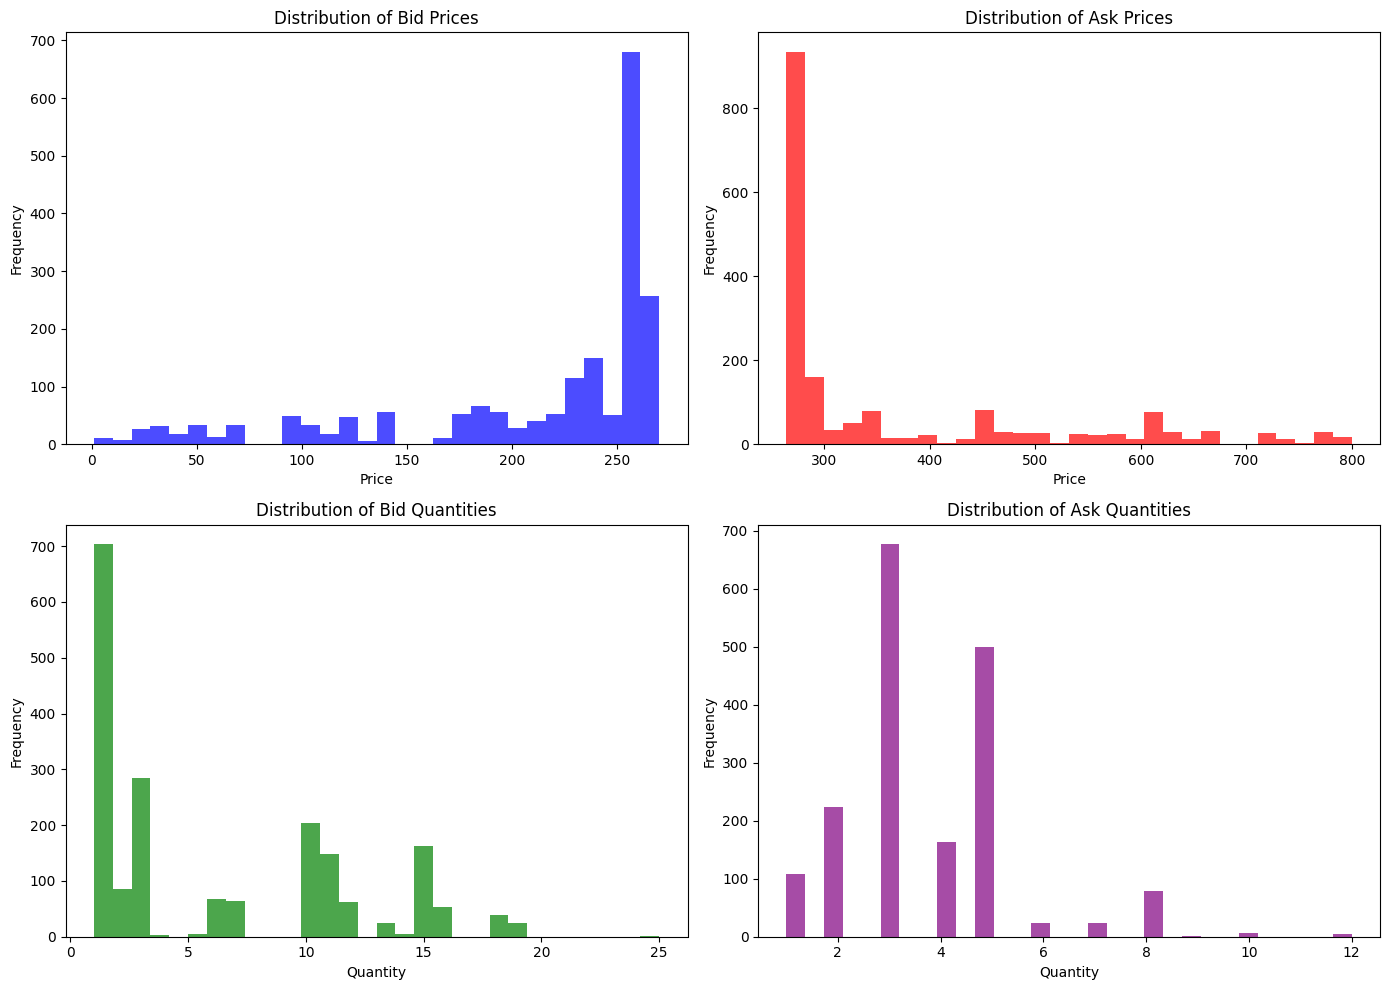

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of bid and ask prices and quantities
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Bid Prices
ax[0, 0].hist(bids_df['Price'], bins=30, color='blue', alpha=0.7)
ax[0, 0].set_title('Distribution of Bid Prices')
ax[0, 0].set_xlabel('Price')
ax[0, 0].set_ylabel('Frequency')

# Ask Prices
ax[0, 1].hist(asks_df['Price'], bins=30, color='red', alpha=0.7)
ax[0, 1].set_title('Distribution of Ask Prices')
ax[0, 1].set_xlabel('Price')
ax[0, 1].set_ylabel('Frequency')

# Bid Quantities
ax[1, 0].hist(bids_df['Quantity'], bins=30, color='green', alpha=0.7)
ax[1, 0].set_title('Distribution of Bid Quantities')
ax[1, 0].set_xlabel('Quantity')
ax[1, 0].set_ylabel('Frequency')

# Ask Quantities
ax[1, 1].hist(asks_df['Quantity'], bins=30, color='purple', alpha=0.7)
ax[1, 1].set_title('Distribution of Ask Quantities')
ax[1, 1].set_xlabel('Quantity')
ax[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
